In [2]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mv kaggle.json ~/.kaggle/
!mkdir -p ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'


In [6]:
import kaggle

# Set the dataset name and destination folder
dataset_name = "kmader/skin-cancer-mnist-ham10000"
destination_folder = "/content/drive/MyDrive/Machine-learning"

# Download the dataset
kaggle.api.dataset_download_files(dataset_name, path=destination_folder, unzip=True)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("Import ok!")

Import ok!


In [10]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')

In [11]:
# Extract labels and image data
labels = data['label']
images = data.drop(columns=['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [12]:
# Initialize Random Forest classifier with adjusted hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


In [13]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

#Oversampling

In [15]:
# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)


In [16]:
# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8766849725411883
Testing Accuracy: 0.707938092860709


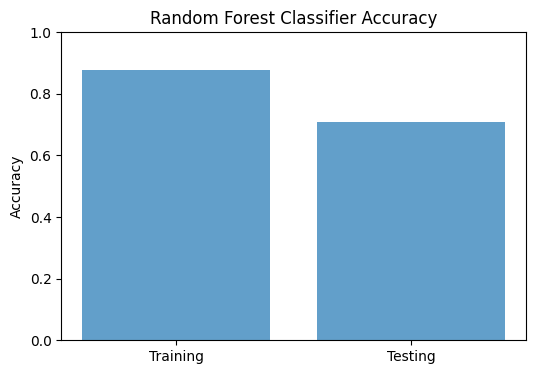

In [17]:
# Plot training and testing accuracy
epochs = np.arange(2)
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(epochs, accuracies, align='center', alpha=0.7)
plt.xticks(epochs, ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.ylim(0, 1)
plt.show()

#Standardization and Splitting Data